# Special Token 찾기

In [5]:
import pandas as pd
import re
from collections import Counter

def extract_special_tokens(text):
    return set(re.findall(r'#\w+#', text))

def analyze_dataset(df, name, dialogue_column='dialogue', summary_column=None):
    dialogue_tokens = set()
    summary_tokens = set()
    mismatched_tokens = set()

    for _, row in df.iterrows():
        d_tokens = extract_special_tokens(row[dialogue_column])
        dialogue_tokens.update(d_tokens)
        
        if summary_column:
            s_tokens = extract_special_tokens(row[summary_column])
            summary_tokens.update(s_tokens)
            mismatched_tokens.update(s_tokens - d_tokens)

    print(f"\n{name} 데이터셋 분석:")
    print(f"대화 unique token 수: {len(dialogue_tokens)}")
    if summary_column:
        print(f"요약 unique token 수: {len(summary_tokens)}")
        print(f"공통 token 수: {len(dialogue_tokens & summary_tokens)}")
        print(f"불일치 token 수 (요약에만 있음): {len(mismatched_tokens)}")
    
    return dialogue_tokens, summary_tokens, mismatched_tokens

def analyze_all_datasets(train_path, valid_path, test_path):
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)

    train_d, train_s, train_m = analyze_dataset(train_df, "Train", summary_column='summary')
    valid_d, valid_s, valid_m = analyze_dataset(valid_df, "Valid", summary_column='summary')
    test_d, _, _ = analyze_dataset(test_df, "Test")  # Test에는 summary 열이 없음

    all_dialogue_tokens = train_d | valid_d | test_d
    all_summary_tokens = train_s | valid_s
    all_tokens = all_dialogue_tokens | all_summary_tokens

    print("\n전체 데이터셋 분석:")
    print(f"총 unique token 수: {len(all_tokens)}")
    print(f"모든 데이터셋의 대화에 공통으로 나타나는 token 수: {len(train_d & valid_d & test_d)}")
    
    print("\n데이터셋 간 불일치:")
    print(f"Train 대화에만 있는 token: {len(train_d - (valid_d | test_d))}")
    print(f"Valid 대화에만 있는 token: {len(valid_d - (train_d | test_d))}")
    print(f"Test 대화에만 있는 token: {len(test_d - (train_d | valid_d))}")

    print("\n요약에서만 나타나는 token:")
    print(f"Train: {train_m}")
    print(f"Valid: {valid_m}")

    return all_tokens

def create_token_mapping(tokens):
    return {token: re.sub(r'\d+', '', token) for token in tokens}

# 메인 실행 코드
train_path = './data/train.csv'
valid_path = './data/dev.csv'
test_path = './data/test.csv'

all_tokens = analyze_all_datasets(train_path, valid_path, test_path)

# Token 일반화 매핑 생성
token_mapping = create_token_mapping(all_tokens)

print("\nToken 일반화 매핑:")
for original, generalized in token_mapping.items():
    if original != generalized:
        print(f"{original} -> {generalized}")

# Token 일반화 함수
def generalize_tokens(text, mapping):
    for original, generalized in mapping.items():
        text = text.replace(original, generalized)
    return text


Train 데이터셋 분석:
대화 unique token 수: 16
요약 unique token 수: 6
공통 token 수: 6
불일치 token 수 (요약에만 있음): 0

Valid 데이터셋 분석:
대화 unique token 수: 7
요약 unique token 수: 4
공통 token 수: 3
불일치 token 수 (요약에만 있음): 1

Test 데이터셋 분석:
대화 unique token 수: 6

전체 데이터셋 분석:
총 unique token 수: 17
모든 데이터셋의 대화에 공통으로 나타나는 token 수: 5

데이터셋 간 불일치:
Train 대화에만 있는 token: 8
Valid 대화에만 있는 token: 0
Test 대화에만 있는 token: 0

요약에서만 나타나는 token:
Train: set()
Valid: {'#사람1#'}

Token 일반화 매핑:
#Person4# -> #Person#
#Person1# -> #Person#
#Person5# -> #Person#
#Person2# -> #Person#
#Person7# -> #Person#
#사람1# -> #사람#
#Person6# -> #Person#
#Person3# -> #Person#


In [4]:
import pandas as pd
import re
from collections import Counter

def extract_special_tokens(text):
    return set(re.findall(r'#\w+#', text))

def analyze_dataset(df, name, dialogue_column='dialogue', summary_column=None):
    dialogue_tokens = set()
    summary_tokens = set()

    for _, row in df.iterrows():
        dialogue_tokens.update(extract_special_tokens(row[dialogue_column]))
        if summary_column:
            summary_tokens.update(extract_special_tokens(row[summary_column]))

    print(f"\n{name} 데이터셋 분석:")
    print(dialogue_tokens)
    print(f"대화 unique token 수: {len(dialogue_tokens)}")
    if summary_column:
        print(f"요약 unique token 수: {len(summary_tokens)}")
        print(f"공통 token 수: {len(dialogue_tokens & summary_tokens)}")
    
    return dialogue_tokens, summary_tokens

def analyze_all_datasets(train_path, valid_path, test_path):
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)

    train_d, train_s = analyze_dataset(train_df, "Train", summary_column='summary')
    valid_d, valid_s = analyze_dataset(valid_df, "Valid", summary_column='summary')
    test_d, _ = analyze_dataset(test_df, "Test")

    all_tokens = train_d | train_s | valid_d | valid_s | test_d
    return all_tokens

def optimize_special_tokens(tokens):
    # 토큰 일반화 (숫자 제거)
    generalized_tokens = set(re.sub(r'\d+', '', token) for token in tokens)
    
    # '사람'을 'Person'으로 통일
    unified_tokens = set(token.replace('사람', 'Person') for token in generalized_tokens)
    
    return sorted(unified_tokens)

# 메인 실행 코드
train_path = './data/train.csv'
valid_path = './data/dev.csv'
test_path = './data/test.csv'

all_tokens = analyze_all_datasets(train_path, valid_path, test_path)
optimized_tokens = optimize_special_tokens(all_tokens)

print("\n모든 Special Token 목록:")
for token in all_tokens:
    print(token)

print("\n최적화된 Special Token 목록:")
for token in optimized_tokens:
    print(token)

# 토큰 사용 빈도 분석
def analyze_token_frequency(df, column, tokens):
    text = ' '.join(df[column].astype(str))
    return {token: len(re.findall(re.escape(token), text)) for token in tokens}

train_df = pd.read_csv(train_path)
token_frequency = analyze_token_frequency(train_df, 'dialogue', optimized_tokens)

print("\nToken 사용 빈도 (Train 데이터셋 기준):")
for token, freq in sorted(token_frequency.items(), key=lambda x: x[1], reverse=True):
    print(f"{token}: {freq}")


Train 데이터셋 분석:
{'#CarNumber#', '#PassportNumber#', '#Person#', '#CardNumber#', '#Person3#', '#Email#', '#Person6#', '#DateOfBirth#', '#Person2#', '#SSN#', '#Person7#', '#Address#', '#Person5#', '#PhoneNumber#', '#Person1#', '#Person4#'}
대화 unique token 수: 16
요약 unique token 수: 6
공통 token 수: 6

Valid 데이터셋 분석:
{'#DateOfBirth#', '#Person2#', '#Address#', '#Person3#', '#PhoneNumber#', '#Person1#', '#Person4#'}
대화 unique token 수: 7
요약 unique token 수: 4
공통 token 수: 3

Test 데이터셋 분석:
{'#Person2#', '#Address#', '#Person3#', '#PassportNumber#', '#PhoneNumber#', '#Person1#'}
대화 unique token 수: 6

모든 Special Token 목록:
#CarNumber#
#PassportNumber#
#Person#
#사람1#
#CardNumber#
#Person3#
#Email#
#Person6#
#DateOfBirth#
#Person2#
#SSN#
#Person7#
#Address#
#Person5#
#PhoneNumber#
#Person1#
#Person4#

최적화된 Special Token 목록:
#Address#
#CarNumber#
#CardNumber#
#DateOfBirth#
#Email#
#PassportNumber#
#Person#
#PhoneNumber#
#SSN#

Token 사용 빈도 (Train 데이터셋 기준):
#Person1#: 61318
#Person2#: 56446
#Person3#: 384


: 

# Encoder/Decoder max length 찾기

Train Dialogue 통계:
  최소 길이: 43
  최대 길이: 1115
  평균 길이: 204.54
  중앙값 길이: 186.0
  90퍼센타일 길이: 320.00
  95퍼센타일 길이: 370.00
  99퍼센타일 길이: 543.00
Train Summary 통계:
  최소 길이: 8
  최대 길이: 198
  평균 길이: 40.67
  중앙값 길이: 37.0
  90퍼센타일 길이: 63.00
  95퍼센타일 길이: 72.00
  99퍼센타일 길이: 94.00
Valid Dialogue 통계:
  최소 길이: 58
  최대 길이: 765
  평균 길이: 203.66
  중앙값 길이: 187.0
  90퍼센타일 길이: 324.20
  95퍼센타일 길이: 369.00
  99퍼센타일 길이: 494.02
Valid Summary 통계:
  최소 길이: 11
  최대 길이: 116
  평균 길이: 38.64
  중앙값 길이: 35.0
  90퍼센타일 길이: 61.20
  95퍼센타일 길이: 70.10
  99퍼센타일 길이: 92.12
Test Dialogue 통계:
  최소 길이: 50
  최대 길이: 1366
  평균 길이: 211.77
  중앙값 길이: 195.0
  90퍼센타일 길이: 334.20
  95퍼센타일 길이: 390.10
  99퍼센타일 길이: 489.78


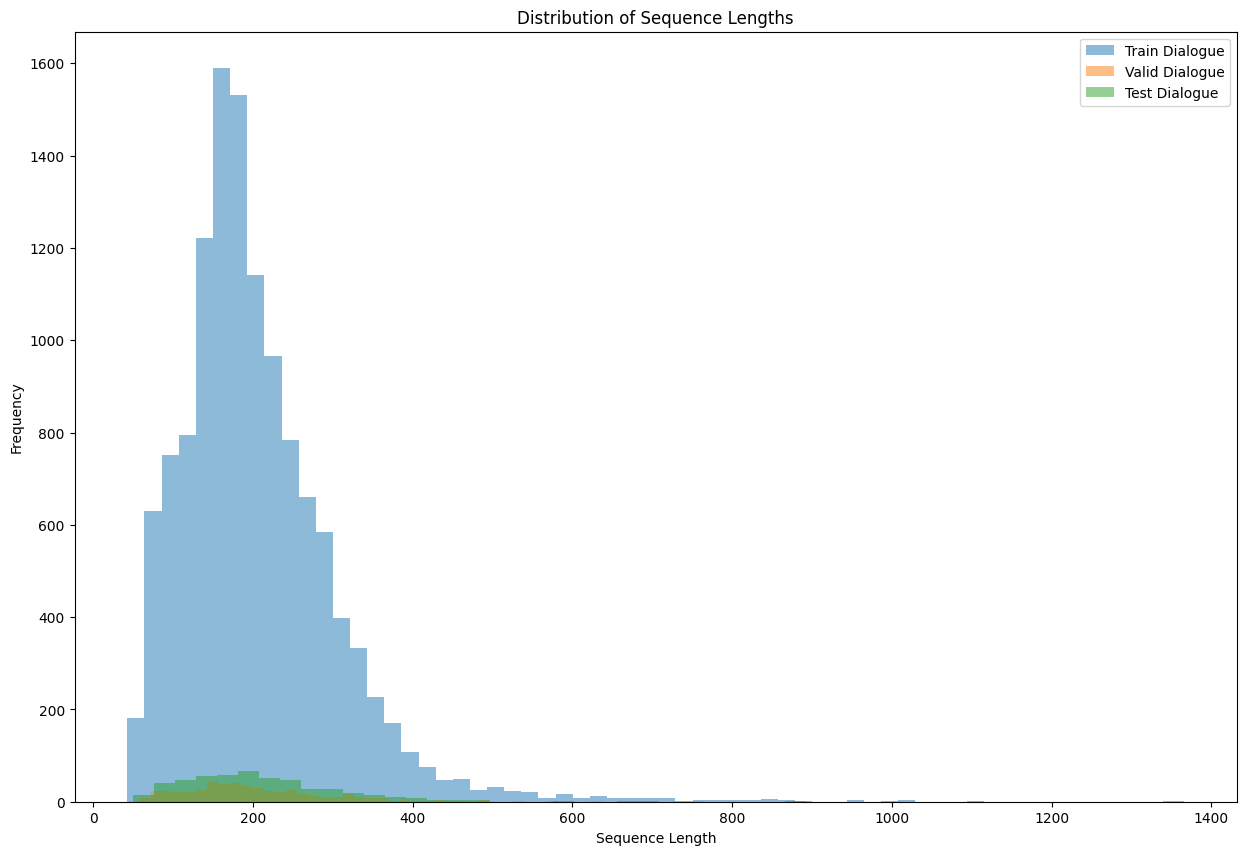


추천 encoder_max_len: 371
추천 decoder_max_len: 72


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

def analyze_sequence_lengths(train_path, valid_path, test_path, model_name="digit82/kobart-summarization"):
    # 데이터 로드
    train_df = pd.read_csv(train_path)
    valid_df = pd.read_csv(valid_path)
    test_df = pd.read_csv(test_path)
    
    # 토크나이저 로드
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    # 길이 계산 함수
    def get_lengths(texts):
        return [len(tokenizer.encode(text)) for text in texts]
    
    # 각 데이터셋의 길이 계산
    train_dialogue_lengths = get_lengths(train_df['dialogue'])
    train_summary_lengths = get_lengths(train_df['summary'])
    valid_dialogue_lengths = get_lengths(valid_df['dialogue'])
    valid_summary_lengths = get_lengths(valid_df['summary'])
    test_dialogue_lengths = get_lengths(test_df['dialogue'])
    
    # 통계 계산
    def print_stats(name, lengths):
        print(f"{name} 통계:")
        print(f"  최소 길이: {np.min(lengths)}")
        print(f"  최대 길이: {np.max(lengths)}")
        print(f"  평균 길이: {np.mean(lengths):.2f}")
        print(f"  중앙값 길이: {np.median(lengths)}")
        print(f"  90퍼센타일 길이: {np.percentile(lengths, 90):.2f}")
        print(f"  95퍼센타일 길이: {np.percentile(lengths, 95):.2f}")
        print(f"  99퍼센타일 길이: {np.percentile(lengths, 99):.2f}")
    
    print_stats("Train Dialogue", train_dialogue_lengths)
    print_stats("Train Summary", train_summary_lengths)
    print_stats("Valid Dialogue", valid_dialogue_lengths)
    print_stats("Valid Summary", valid_summary_lengths)
    print_stats("Test Dialogue", test_dialogue_lengths)
    
    # 히스토그램 그리기
    plt.figure(figsize=(15, 10))
    plt.hist(train_dialogue_lengths, bins=50, alpha=0.5, label='Train Dialogue')
    plt.hist(valid_dialogue_lengths, bins=50, alpha=0.5, label='Valid Dialogue')
    plt.hist(test_dialogue_lengths, bins=50, alpha=0.5, label='Test Dialogue')
    # plt.hist(train_summary_lengths, bins=50, alpha=0.5, label='Train Summary')
    # plt.hist(valid_summary_lengths, bins=50, alpha=0.5, label='Valid Summary')
    plt.xlabel('Sequence Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Sequence Lengths')
    plt.legend()
    plt.show()
    
    # 최적 길이 추천
    def recommend_length(lengths, coverage=0.95):
        return int(np.percentile(lengths, coverage * 100))
    
    encoder_max_len = recommend_length(train_dialogue_lengths + valid_dialogue_lengths + test_dialogue_lengths)
    decoder_max_len = recommend_length(train_summary_lengths + valid_summary_lengths)
    
    print(f"\n추천 encoder_max_len: {encoder_max_len}")
    print(f"추천 decoder_max_len: {decoder_max_len}")
    
    return encoder_max_len, decoder_max_len

train_path = './data/train.csv'
valid_path = './data/dev.csv'
test_path = './data/test.csv'

encoder_max_len, decoder_max_len = analyze_sequence_lengths(train_path, valid_path, test_path)